In [3]:
!pip install -q tensorflow-gpu==2.7.0rc1
import tensorflow as tf
print(tf.__version__) 

You should consider upgrading via the 'c:\users\rishabh\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


2.7.0-rc1


In [4]:
mnist = tf.keras.datasets.mnist

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train, X_test = X_train/255.0, X_test/255.0

print(f"X train's shape: {X_train.shape}" )

11501568/11490434 [==============================] - 1s 0us/step
X train's shape: (60000, 28, 28)


In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Dense(10, activation='softmax')
])

In [8]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

In [10]:
result = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1388 - accuracy: 0.9588 - val_loss: 0.1035 - val_accuracy: 0.9675
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1068 - accuracy: 0.9676 - val_loss: 0.0837 - val_accuracy: 0.9741
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0869 - accuracy: 0.9731 - val_loss: 0.0791 - val_accuracy: 0.9762
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0728 - accuracy: 0.9768 - val_loss: 0.0728 - val_accuracy: 0.9775
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0643 - accuracy: 0.9790 - val_loss: 0.0703 - val_accuracy: 0.9791
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0596 - accuracy: 0.9807 - val_loss: 0.0664 - val_accuracy: 0.9811
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0519 - accuracy: 0.9835 - val_loss: 0.0681 - val_accuracy:

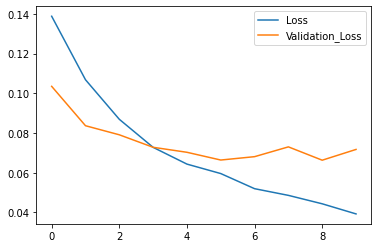

In [11]:
import matplotlib.pyplot as plt
plt.plot(result.history['loss'], label='Loss')
plt.plot(result.history['val_loss'], label='Validation_Loss')
plt.legend()

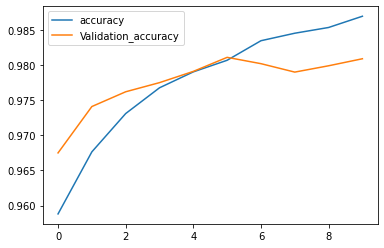

In [12]:
plt.plot(result.history['accuracy'], label='accuracy')
plt.plot(result.history['val_accuracy'], label='Validation_accuracy')
plt.legend()

In [13]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 0s 814us/step - loss: 0.0717 - accuracy: 0.9809


[0.07171846181154251, 0.98089998960495]

Confusion Matrix, Without Normalization
[[ 969    0    1    1    1    0    4    1    3    0]
 [   0 1123    3    1    0    0    3    1    4    0]
 [   1    0 1013    5    2    0    1    5    5    0]
 [   0    0    4  993    0    3    0    4    3    3]
 [   2    0    3    0  965    0    3    1    1    7]
 [   3    0    0   12    1  866    4    1    2    3]
 [   4    2    0    1    1    4  946    0    0    0]
 [   0    3    9    2    1    0    0 1004    2    7]
 [   2    0    3    7    3    2    4    3  945    5]
 [   1    3    0    3   10    1    0    5    1  985]]


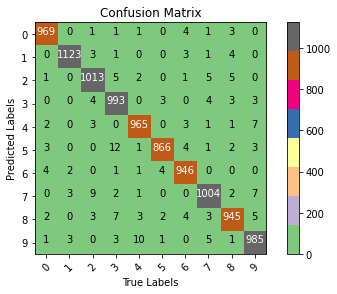

In [20]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, 
                          title="Confusion Matrix",
                          cmap=plt.cm.Accent,):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix, Without Normalization")

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45) 
    plt.yticks(tick_marks, classes) 

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2. 
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment='center',
        color="white" if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.xlabel('True Labels')
    plt.ylabel('Predicted Labels')
    plt.show()

p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(Y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))


Text(0.5, 1.0, 'True Label: 6 Predicted: 0')

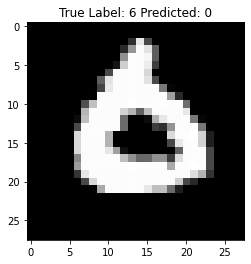

In [25]:
misclassified_idx = np.where(p_test!=Y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i], cmap='gray')
plt.title("True Label: %s Predicted: %s" % (Y_test[i], p_test[i]))